## 라이브러리 호출

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

## 데이터 로드

In [2]:
df = pd.read_csv("insurance.csv")
df.shape

(1338, 7)

In [3]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


## 데이터 전처리

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# 결측치 확인하기
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# 성별 데이터 값 전환
df.loc[(df.sex == 'male'), 'sex'] = 1
df.loc[(df.sex == 'female'), 'sex'] = 0
df = df.astype({'sex':'int'})
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,yes,southwest,16884.9240
1,18,1,33.77,1,no,southeast,1725.5523


In [9]:
# 흡연 데이터 값 전환
df.loc[(df.smoker == 'yes'), 'smoker'] = 1
df.loc[(df.smoker == 'no'), 'smoker'] = 0
df = df.astype({'smoker':'int'})
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,southwest,16884.9240
1,18,1,33.77,1,0,southeast,1725.5523


## EDA

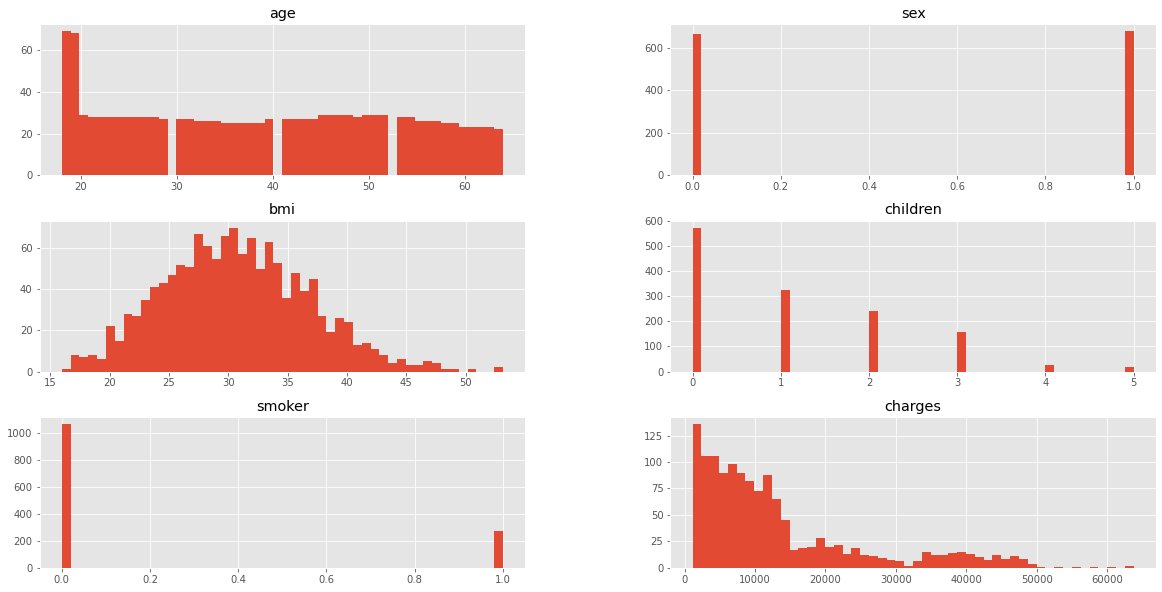

In [10]:
_ = df.hist(figsize=(20,10), bins=50)

<AxesSubplot:xlabel='age', ylabel='charges'>

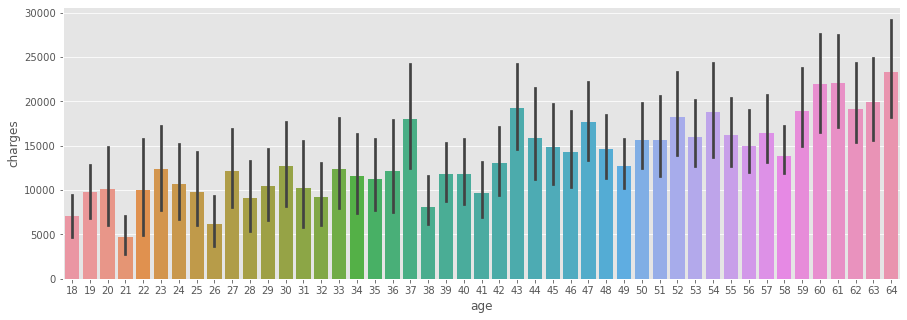

In [11]:
# 나이에 따른 보험료 막대그래프

plt.figure(figsize=(15,5))
sns.barplot(data=df, x="age", y="charges")

<AxesSubplot:xlabel='sex', ylabel='charges'>

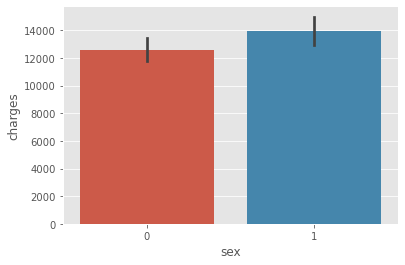

In [12]:
# 성별에 따른 보험료 막대그래프

sns.barplot(data=df, x="sex", y="charges")

<AxesSubplot:xlabel='children', ylabel='charges'>

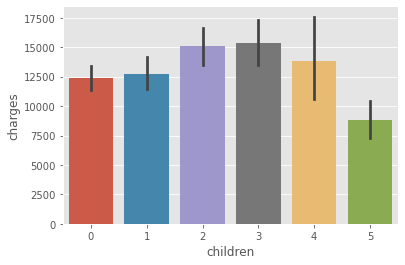

In [13]:
# 어린이 보험료

sns.barplot(data=df, x="children", y="charges")

<AxesSubplot:xlabel='charges', ylabel='Density'>

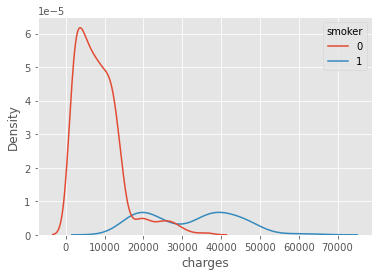

In [14]:
# 흡연 여부에 따른 보험료 kde플롯

sns.kdeplot(data=df, x="charges", hue="smoker")

<AxesSubplot:xlabel='age', ylabel='charges'>

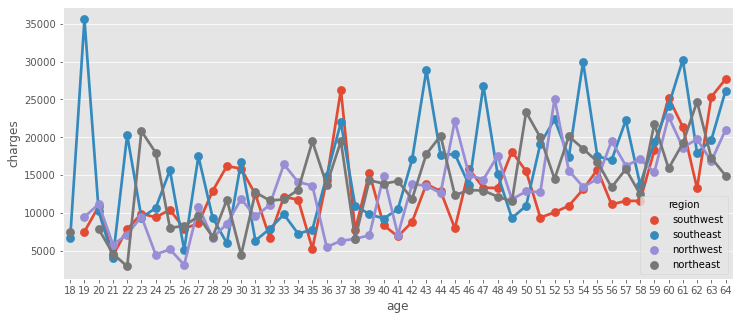

In [15]:
# 지역별 나이에 따른 보험료 포인트 플롯

plt.figure(figsize=(12,5))
sns.pointplot(data=df, x="age", y="charges", hue="region", ci=None)

<AxesSubplot:xlabel='age'>

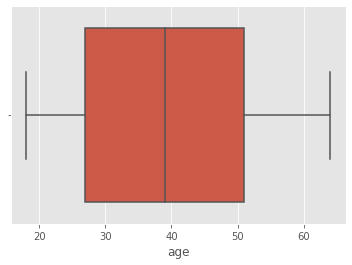

In [16]:
# 연령 박스 플롯

sns.boxplot(data=df, x='age')

<AxesSubplot:xlabel='bmi'>

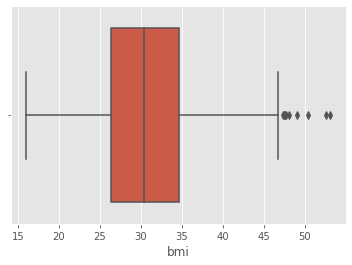

In [17]:
# bmi 박스 플롯

sns.boxplot(data=df, x='bmi')

<AxesSubplot:xlabel='sex', ylabel='charges'>

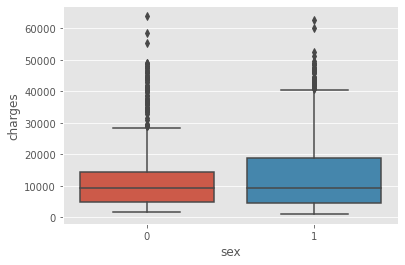

In [18]:
# 성별 보험료 박스 플롯

sns.boxplot(data=df, x=df['sex'], y=df["charges"])

<AxesSubplot:xlabel='region', ylabel='charges'>

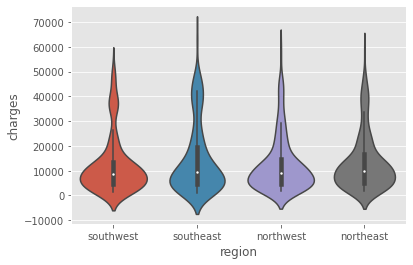

In [19]:
# 지역별 보험료 바이올린 플롯

sns.violinplot(y = df['charges'], x = df['region'])

<AxesSubplot:>

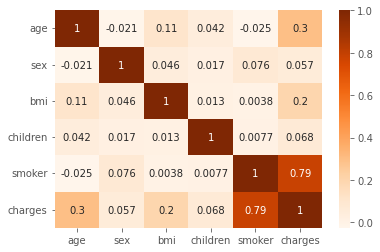

In [20]:
# 컬럼 간 상관계수 히트맵

sns.heatmap(df.corr(), annot = True, cmap = 'Oranges')

## 학습, 예측 데이터셋 설정

In [21]:
label_name = "charges"
label_name

'charges'

In [22]:
feature_names = df.columns.tolist()
feature_names.remove(label_name)
feature_names

['age', 'sex', 'bmi', 'children', 'smoker', 'region']

In [23]:
X = df[feature_names]
y = df[label_name]
X.shape, y.shape

((1338, 6), (1338,))

In [24]:
X_ohe = pd.get_dummies(df[feature_names])
X_ohe.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0


In [25]:
# StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_scaled = ss.fit_transform(X_ohe)
X_scaled

array([[-1.43876426, -1.0105187 , -0.45332   , ..., -0.56641788,
        -0.61132367,  1.76548098],
       [-1.50996545,  0.98959079,  0.5096211 , ..., -0.56641788,
         1.63579466, -0.56641788],
       [-0.79795355,  0.98959079,  0.38330685, ..., -0.56641788,
         1.63579466, -0.56641788],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , ..., -0.56641788,
         1.63579466, -0.56641788],
       [-1.29636188, -1.0105187 , -0.79781341, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [ 1.55168573, -1.0105187 , -0.26138796, ...,  1.76548098,
        -0.61132367, -0.56641788]])

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, shuffle=True, test_size=0.2, random_state=42
)

In [27]:
print('X_train.shape :',X_train.shape)
print('X_test.shape :',X_test.shape)
print('y_train.shape :',y_train.shape)
print('y_test.shape :',y_test.shape)

X_train.shape : (1070, 9)
X_test.shape : (268, 9)
y_train.shape : (1070,)
y_test.shape : (268,)


## 모델링

In [28]:
import lightgbm as lgb

In [29]:
train_ds = lgb.Dataset(X_train, y_train)
train_ds

In [30]:
test_ds = lgb.Dataset(X_test, y_test)
test_ds

In [31]:
params = {'learning_rate': 0.01, 
          'max_depth': 16, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mse', 
          'is_training_metric': True, 
          'num_leaves': 144, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':2018}

In [32]:
model = lgb.train(
    params, train_ds, 1000, test_ds, verbose_eval=500, early_stopping_rounds=100
)
model

C:\Users\hyojj\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\hyojj\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000540 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 328
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 9
[LightGBM] [Info] Start training from score 13346.089733
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [33]:
y_predict = model.predict(X_test)
y_predict[:10]

array([11660.10642071,  6178.40960861, 26398.00686489, 10753.52540681,
       33648.52408295,  6557.22762277,  2909.66749318, 14807.0219516 ,
        5114.02529648, 11134.1904975 ])

In [34]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_predict)

2491.331618780516

In [35]:
# mean_squared_error
mse = np.square(y_test- y_predict).mean()
mse

19273519.89875031

In [36]:
# rmse
rmse = np.sqrt(mse)
rmse

4390.1617166968135

In [37]:
# rmsle
rmsle = np.sqrt(np.square(np.log(y_test + 1) - np.log(y_predict + 1)).mean())
rmsle

0.4246054464767249